In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('data/sulphates.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ph            3276 non-null   float64
 1   Hardness      3276 non-null   float64
 2   Solids        3276 non-null   float64
 3   Conductivity  3276 non-null   float64
 4   Turbidity     3276 non-null   float64
 5   Sulfate       3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


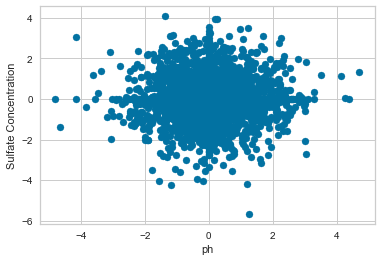

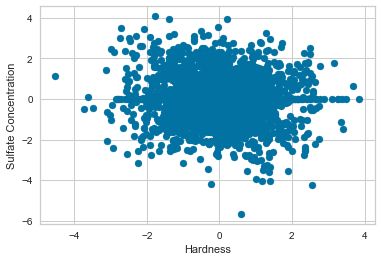

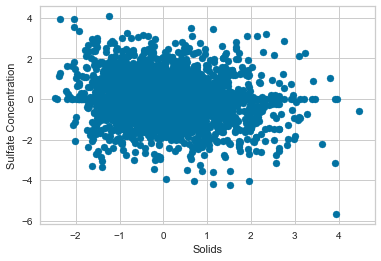

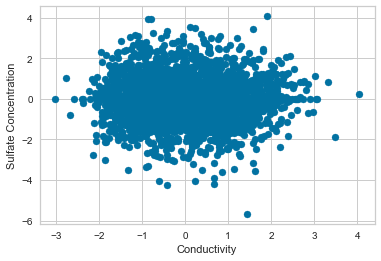

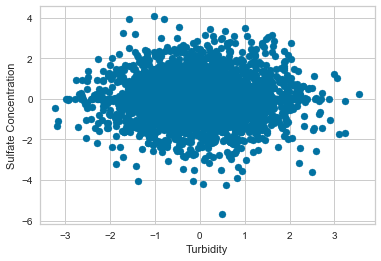

In [30]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Sulfate"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Sulfate Concentration")
    plt.show()

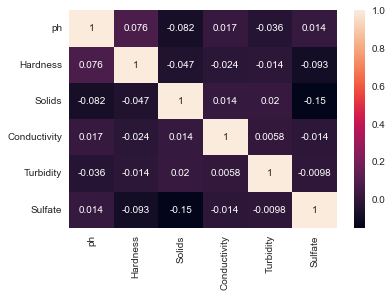

In [31]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [32]:
from pycaret.regression import *
regression = setup(df, target='Sulfate', fold=3)
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,4033
1,Target,Sulfate
2,Target type,Regression
3,Original data shape,"(3276, 6)"
4,Transformed data shape,"(3276, 6)"
5,Transformed train set shape,"(2293, 6)"
6,Transformed test set shape,"(983, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:55:10
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


                                    Model     MAE     MSE    RMSE      R2  \
lr                      Linear Regression  0.7165  1.0059  1.0026  0.0282   
ridge                    Ridge Regression  0.7165  1.0059  1.0026  0.0282   
lar                Least Angle Regression  0.7165  1.0059  1.0026  0.0282   
br                         Bayesian Ridge  0.7138  1.0066  1.0029  0.0276   
huber                     Huber Regressor  0.7052  1.0094  1.0044  0.0249   
omp           Orthogonal Matching Pursuit  0.7119  1.0167  1.0079  0.0179   
ada                    AdaBoost Regressor  0.7252  1.0245  1.0119  0.0097   
lasso                    Lasso Regression  0.6931  1.0361  1.0176 -0.0009   
llar         Lasso Least Angle Regression  0.6931  1.0361  1.0176 -0.0009   
en                            Elastic Net  0.6931  1.0361  1.0176 -0.0009   
dummy                     Dummy Regressor  0.6931  1.0361  1.0176 -0.0009   
rf                Random Forest Regressor  0.7610  1.0898  1.0436 -0.0536   

In [33]:
import pickle 
pickle.dump(best_model, open("Sulfates_Regressor.pkl", "wb"))